# Get data

Load dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import glob
import os

In [2]:
# Step 1: Get all txt file paths in the folder
file_paths = glob.glob("../OpalPatronage/Opal_Patronage_*.txt")

# Optional: Sort by date in filename
file_paths.sort()

# Step 2: Read all files into one DataFrame
df_list = []
for path in file_paths:
    print(f"Reading: {path}")
    df = pd.read_csv(path, sep='|')
    df_list.append(df)

# Step 3: Concatenate into one DataFrame
full_df = pd.concat(df_list, ignore_index=True)

# Step 4 (Optional): Convert <100 to NaN or estimate
def convert(x):
    try:
        return int(x)
    except:
        return 0  # or return 50

full_df['Tap_Ons'] = full_df['Tap_Ons'].apply(convert)
full_df['Tap_Offs'] = full_df['Tap_Offs'].apply(convert)


Reading: ../OpalPatronage\Opal_Patronage_20200101.txt
Reading: ../OpalPatronage\Opal_Patronage_20200102.txt
Reading: ../OpalPatronage\Opal_Patronage_20200103.txt
Reading: ../OpalPatronage\Opal_Patronage_20200104.txt
Reading: ../OpalPatronage\Opal_Patronage_20200105.txt
Reading: ../OpalPatronage\Opal_Patronage_20200106.txt
Reading: ../OpalPatronage\Opal_Patronage_20200107.txt
Reading: ../OpalPatronage\Opal_Patronage_20200108.txt
Reading: ../OpalPatronage\Opal_Patronage_20200109.txt
Reading: ../OpalPatronage\Opal_Patronage_20200110.txt
Reading: ../OpalPatronage\Opal_Patronage_20200111.txt
Reading: ../OpalPatronage\Opal_Patronage_20200112.txt
Reading: ../OpalPatronage\Opal_Patronage_20200113.txt
Reading: ../OpalPatronage\Opal_Patronage_20200114.txt
Reading: ../OpalPatronage\Opal_Patronage_20200115.txt
Reading: ../OpalPatronage\Opal_Patronage_20200116.txt
Reading: ../OpalPatronage\Opal_Patronage_20200117.txt
Reading: ../OpalPatronage\Opal_Patronage_20200118.txt
Reading: ../OpalPatronage\Op

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20672\1340033536.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(df_list, ignore_index=True)


In [3]:
full_df.head(11)

,trip_origin_date,mode_name,ti_region,tap_hour,Tap_Ons,Tap_Offs,https://opendata-tpa.transport.nsw.gov.au/Opal_Patronage/2020-01/Opal_Patronage_20200101.txt
0,2020-01-01,Bus,Chatswood,0.0,0,0,NaN
1,2020-01-01,Bus,Macquarie Park,0.0,0,0,NaN
2,2020-01-01,Bus,Newcastle and surrounds,0.0,0,0,NaN
3,2020-01-01,Bus,North Sydney,0.0,700,100,NaN
4,2020-01-01,Bus,Other,0.0,4500,3200,NaN
5,2020-01-01,Bus,Parramatta,0.0,100,0,NaN
6,2020-01-01,Bus,Strathfield,0.0,0,0,NaN
7,2020-01-01,Bus,Sydney CBD,0.0,3200,200,NaN
8,2020-01-01,Bus,All - NSW,0.0,8500,3500,NaN
9,2020-01-01,Bus,Chatswood,1.0,200,200,NaN


In [4]:
full_df.describe()

,tap_hour,Tap_Ons,Tap_Offs
count,1.372294e+06,1.374316e+06,1.374316e+06
mean,1.216486e+01,3.973596e+03,3.973909e+03
std,6.635858e+00,1.160911e+04,1.154482e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,0.000000e+00,0.000000e+00
50%,1.200000e+01,3.000000e+02,3.000000e+02
75%,1.800000e+01,1.600000e+03,1.600000e+03
max,2.300000e+01,1.721000e+05,2.072000e+05


In [5]:
full_df['mode_name'].unique()

array(['Bus', 'Ferry', 'Light rail', 'Train', 'UNKNOWN', nan],
      dtype=object)

In [6]:
# Drop rows where mode_name is 'UNKNOWN'
full_df = full_df[full_df['mode_name'] != 'UNKNOWN']

In [7]:
full_df['mode_name'].unique()

array(['Bus', 'Ferry', 'Light rail', 'Train', nan], dtype=object)

In [8]:
full_df['ti_region'].unique()

array(['Chatswood', 'Macquarie Park', 'Newcastle and surrounds',
       'North Sydney', 'Other', 'Parramatta', 'Strathfield', 'Sydney CBD',
       'All - NSW', 'Wollongong and surrounds', nan], dtype=object)

In [9]:
full_df.groupby(['mode_name', 'ti_region']).size()

mode_name   ti_region               
Bus         All - NSW                   48504
            Chatswood                   48439
            Macquarie Park              48440
            Newcastle and surrounds     40387
            North Sydney                48355
            Other                       48504
            Parramatta                  48502
            Strathfield                 48356
            Sydney CBD                  48504
            Wollongong and surrounds    37314
Ferry       All - NSW                   40873
            Newcastle and surrounds     36445
            North Sydney                35965
            Other                       40262
            Parramatta                  18598
            Sydney CBD                  40346
Light rail  All - NSW                   46255
            Newcastle and surrounds     40187
            North Sydney                   62
            Other                       45745
            Parramatta                   45

In [10]:
full_df['trip_origin_date'] = pd.to_datetime(full_df['trip_origin_date'])

In [11]:
full_df['tap'] = pd.to_datetime(full_df['trip_origin_date'])

In [12]:
full_df['tap_hour']=pd.to_numeric(full_df['tap_hour'])

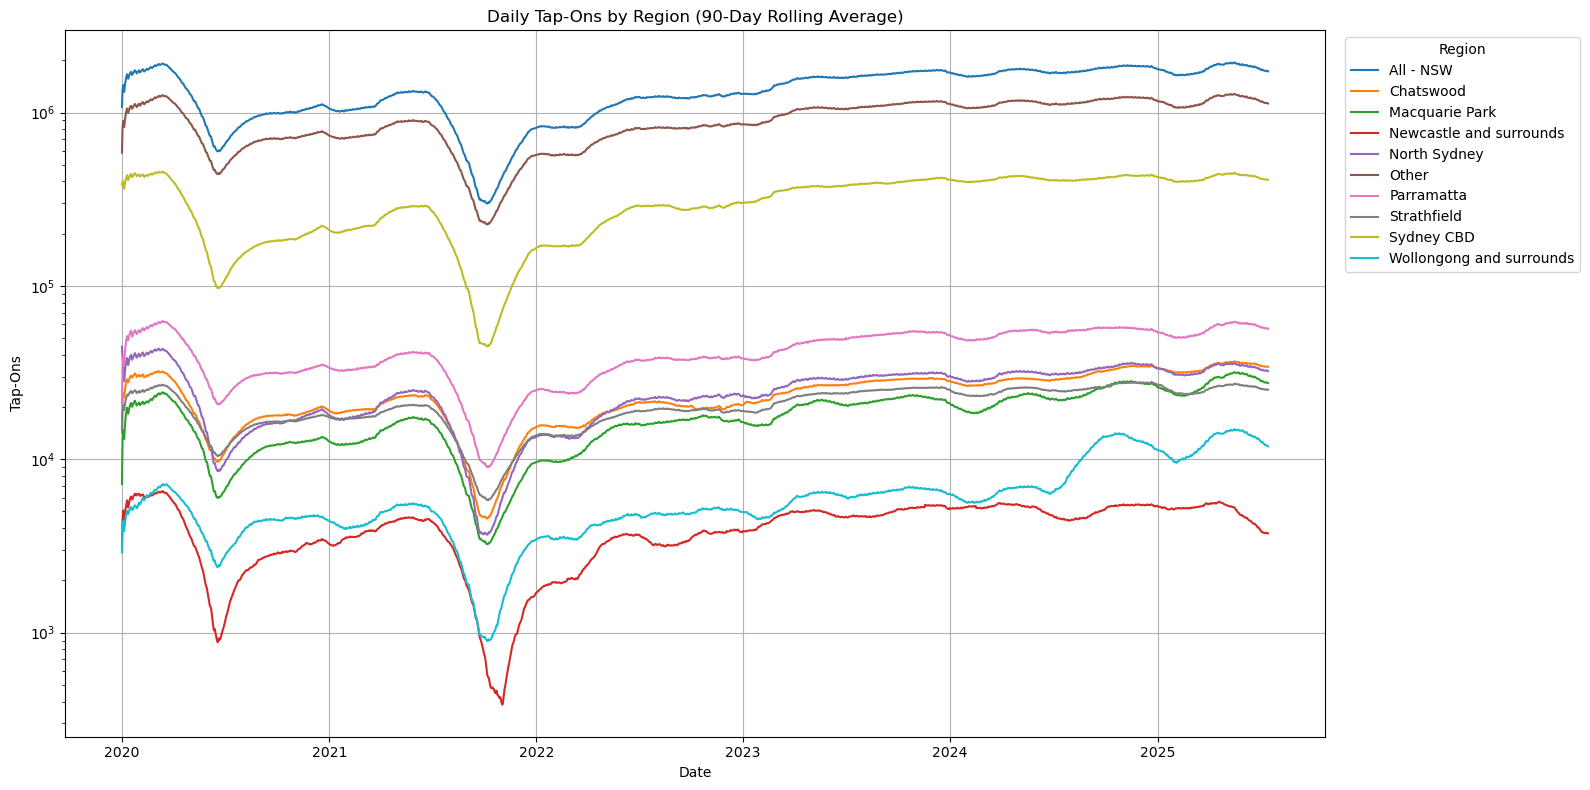

In [13]:
# Group by date and region, then sum
region_daily = full_df.groupby(['trip_origin_date', 'ti_region'])['Tap_Ons'].sum().unstack()

# Apply 7-day rolling average
region_daily_smoothed = region_daily.rolling(window='90D', min_periods=1).mean()

# Plot
plt.figure(figsize=(16,8))
for region in region_daily_smoothed.columns:
    plt.plot(region_daily_smoothed.index, region_daily_smoothed[region], label=region)

plt.title("Daily Tap-Ons by Region (90-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Tap-Ons")
plt.yscale("log")
plt.legend(title="Region", loc='upper left', bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

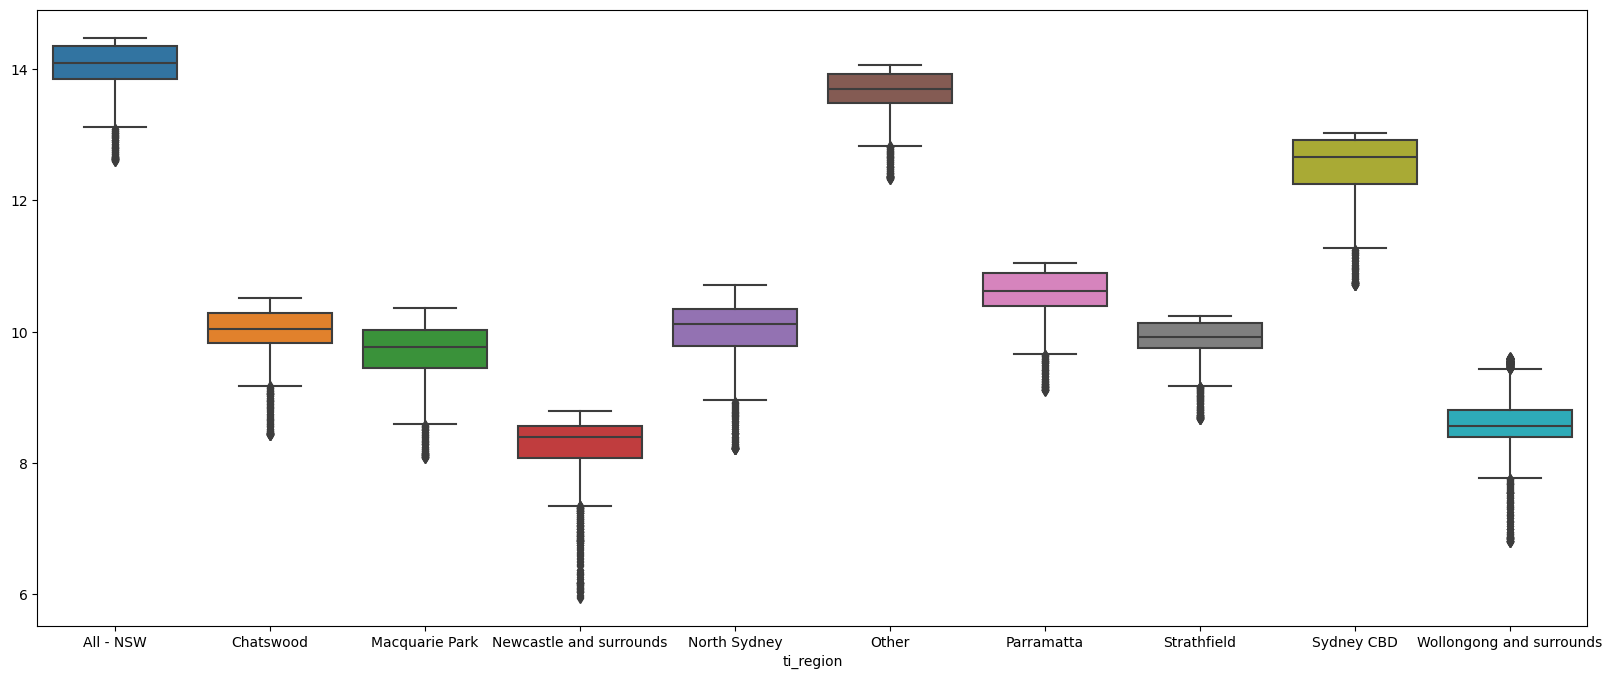

In [14]:
plt.figure(figsize=(20,8))
sns.boxplot(np.log(region_daily_smoothed))
plt.show()

          mean    median     stdev  n_weeks
era                                        
post  0.842744  0.842587  0.164558      134
pre   1.065607  0.959597  0.280549        9


<Axes: title={'center': 'Friday-to-Mon-Thu AM-peak ratio (pre vs post)'}, xlabel='era'>

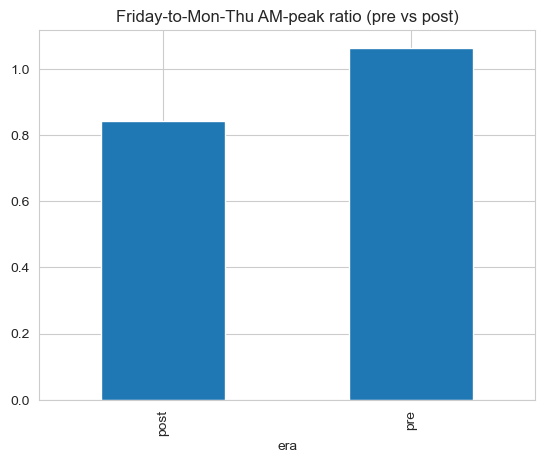

In [119]:
# --- 0.  Make a working copy and clean obvious junk --------------------------
df = full_df.copy()

# drop rows that are just blank padding lines in the source files
df = df[df['trip_origin_date'].notna()]

# keep TRAIN trips only – comment this line out if you want buses as well
# df = df[df['mode_name'].str.lower() == 'train']

# force the date dtype
df['trip_origin_date'] = pd.to_datetime(df['trip_origin_date'])

# --- 1.  Focus on the AM-peak window ----------------------------------------
# 07:00 ≤ hour < 10:00  (tap_hour is numeric: 7, 8, 9)
peak = df[(df['tap_hour'] >= 7) & (df['tap_hour'] < 10)].copy()

# --- 2.  Add calendar helpers -----------------------------------------------
peak['dow']  = peak['trip_origin_date'].dt.dayofweek        # 0=Mon … 4=Fri
peak['year'] = peak['trip_origin_date'].dt.year

# define “pre-COVID” vs “hybrid era”.  Adjust dates if you like.
pre_mask  = peak['trip_origin_date'] <  '2020-03-01'
post_mask = peak['trip_origin_date'] >= '2023-01-01'
peak['era'] = np.where(pre_mask, 'pre', np.where(post_mask, 'post', 'ignore'))
peak = peak[peak['era'] != 'ignore']         # toss 2020-22 transition if not needed

# --- 3.  Aggregate: total Tap_Ons per date & DOW -----------------------------
daily = (peak
         .groupby(['era','trip_origin_date','dow'], as_index=False)['Tap_Ons']
         .sum())

# --- 4.  Convert to week-level and compute Friday ratio ----------------------
# ISO week key so Jan 1 of each year doesn’t mix
daily['iso_year'] = daily['trip_origin_date'].dt.isocalendar().year
daily['iso_week'] = daily['trip_origin_date'].dt.isocalendar().week
daily['yrwk'] = daily['iso_year'] * 100 + daily['iso_week']   # e.g. 202452

weekly = (daily
          .pivot_table(index=['era','yrwk'], columns='dow', values='Tap_Ons')
          .rename(columns={0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri'}))

weekly['Tue_Thu_mean'] = weekly[['Mon', 'Tue','Wed','Thu']].mean(axis=1)
weekly['fri_ratio']    = weekly['Fri'] / weekly['Tue_Thu_mean']

# --- 5.  Summarise & inspect -------------------------------------------------
summary = (weekly.groupby('era')['fri_ratio']
                  .agg(mean='mean', median='median', stdev='std', n_weeks='size'))
print(summary)

# optional: quick bar chart
summary['mean'].plot.bar(title='Friday-to-Mon-Thu AM-peak ratio (pre vs post)')

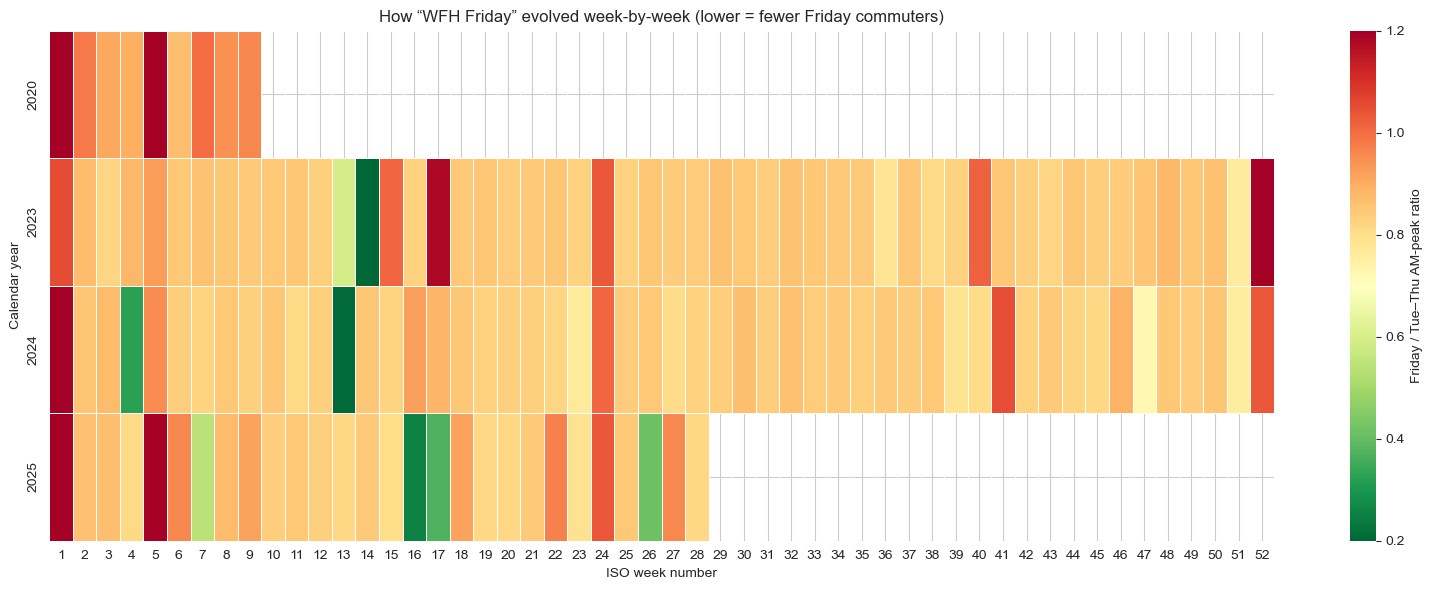

In [ ]:
heat = weekly.reset_index()             # columns: era, yrwk, ..., fri_ratio
heat['year'] = heat['yrwk'] // 100
heat['week'] = heat['yrwk']  % 100
    
# pivot so each row is a calendar year, each column an ISO week number
pivot = heat.pivot_table(index='year', columns='week', values='fri_ratio')

plt.figure(figsize=(16, 6))
sns.heatmap(
    pivot,
    cmap='RdYlGn_r',
    vmin=0.2, vmax=1.2,   # tweak if your ratios go wider
    linewidths=.5,
    cbar_kws={'label': 'Friday / Tue–Thu AM-peak ratio'}
)
plt.title('How “WFH Friday” evolved week-by-week (lower = fewer Friday commuters)')
plt.ylabel('Calendar year')
plt.xlabel('ISO week number')
plt.tight_layout()
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

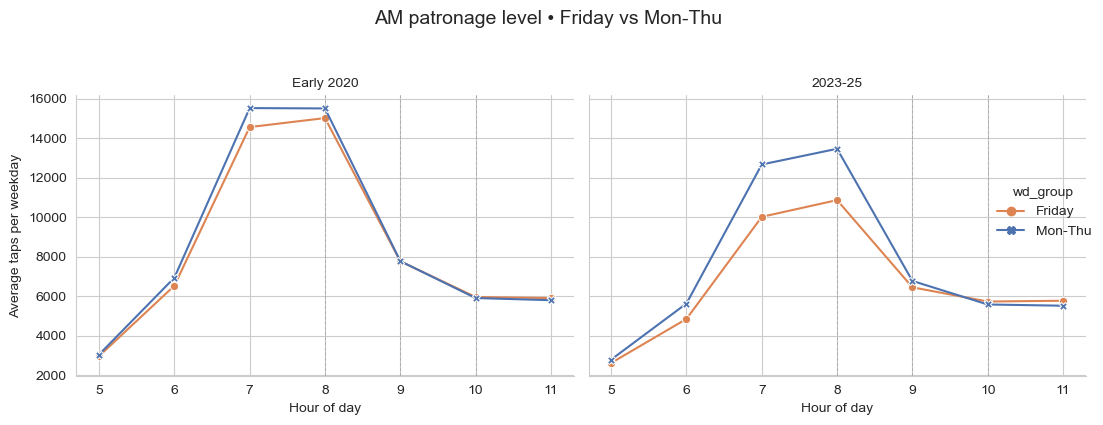

In [121]:
df['dow'] = df['trip_origin_date'].dt.dayofweek

df['era'] = np.select(
        [df['trip_origin_date'] <  '2020-03-01',
         df['trip_origin_date'] >= '2023-01-01'],
        ['pre', 'post'],
        default='ignore'
    )
df = df[df['era'] != 'ignore']

# 1. keep AM window 07-10 and weekdays only
morning = df[(df['dow'] <= 4) & df['tap_hour'].between(5, 11)].copy()

# 2. map weekday group + era label (nice names)
morning['wd_group']   = np.where(morning['dow'] == 4, 'Friday', 'Mon-Thu')
morning['era_label']  = morning['era'].map({'pre':'Early 2020', 'post':'2023-25'})

# 3. average taps per hour per weekday (so eras with more weeks don’t dominate)
hourly_avg = (morning
              .groupby(['era_label','wd_group','tap_hour'], as_index=False)
              ['Tap_Ons'].mean())

# 4. facet line plot
sns.set_style('whitegrid')
g = sns.relplot(
    data   = hourly_avg,
    x      = 'tap_hour',
    y      = 'Tap_Ons',
    hue    = 'wd_group', style='wd_group',
    kind   = 'line', markers=True, dashes=False,
    col    = 'era_label', col_order=['Early 2020','2023-25'],
    height = 4, aspect = 1.25,
    palette = {'Mon-Thu':'#4c72b0', 'Friday':'#dd8452'}
)

g.set_axis_labels('Hour of day', 'Average taps per weekday')
g.set_titles('{col_name}')
for ax in g.axes.flat:                         # reference lines
    for h in (8, 9, 10):
        ax.axvline(h, ls='--', lw=0.7, c='grey', alpha=0.4)

plt.suptitle('AM patronage level • Friday vs Mon-Thu', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

In [122]:
rainy_data = pd.read_csv("../data/IDCJAC0009_066006_1800/IDCJAC0009_066006_1800_Data.csv")

In [123]:
rainy_data

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,66006,1885,1,1,0.0,NaN,Y
1,IDCJAC0009,66006,1885,1,2,0.0,NaN,Y
2,IDCJAC0009,66006,1885,1,3,3.6,1.0,Y
3,IDCJAC0009,66006,1885,1,4,0.0,NaN,Y
4,IDCJAC0009,66006,1885,1,5,0.0,NaN,Y
...,...,...,...,...,...,...,...,...
51326,IDCJAC0009,66006,2025,7,12,0.0,NaN,N
51327,IDCJAC0009,66006,2025,7,13,0.0,NaN,N
51328,IDCJAC0009,66006,2025,7,14,0.0,NaN,N
51329,IDCJAC0009,66006,2025,7,15,0.0,NaN,N


In [124]:
# Rename for clarity
rainy_data.columns = [
    "product_code", "station_number", "year", "month", "day",
    "rain_mm", "rain_period_days", "rain_quality"
]

# Combine year, month, day into one date column
rainy_data["date"] = pd.to_datetime(rainy_data[["year", "month", "day"]])

# Filter to study range
rainy_data = rainy_data[
    (rainy_data["date"] >= "2020-01-01") &
    (rainy_data["date"] <= "2025-07-15")
]

# Convert rain_mm to numeric (handle NaN or trace values)
rainy_data["rain_mm"] = pd.to_numeric(rainy_data["rain_mm"], errors="coerce")

# Create rainy_day flag (rain > 1mm)
rainy_data["rainy_day"] = (rainy_data["rain_mm"] > 1.0).astype(int)

# Keep only necessary columns
rainy_data = rainy_data[["date", "rain_mm", "rainy_day"]]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20672\931383155.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_data["rain_mm"] = pd.to_numeric(rainy_data["rain_mm"], errors="coerce")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20672\931383155.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_data["rainy_day"] = (rainy_data["rain_mm"] > 1.0).astype(int)


In [125]:
len(rainy_data[rainy_data['rainy_day'] == 1])

641

In [126]:
df = df.merge(
    rainy_data[['date', 'rain_mm', 'rainy_day']],        # only the flag you need
    left_on='trip_origin_date',
    right_on='date',
    how='left'
).drop(columns='date')

In [127]:
# pip install holidays

In [128]:
import holidays
aus_holidays = holidays.Australia(prov="NSW", years=range(2020, 2026))

df["is_public_holiday"] = df["trip_origin_date"].isin(aus_holidays).astype(int)


In [129]:
df

,trip_origin_date,mode_name,ti_region,tap_hour,Tap_Ons,Tap_Offs,https://opendata-tpa.transport.nsw.gov.au/Opal_Patronage/2020-01/Opal_Patronage_20200101.txt,tap,dow,era,rain_mm,rainy_day,is_public_holiday
0,2020-01-01,Bus,Chatswood,0.0,0,0,NaN,2020-01-01,2,pre,0.0,0,1
1,2020-01-01,Bus,Macquarie Park,0.0,0,0,NaN,2020-01-01,2,pre,0.0,0,1
2,2020-01-01,Bus,Newcastle and surrounds,0.0,0,0,NaN,2020-01-01,2,pre,0.0,0,1
3,2020-01-01,Bus,North Sydney,0.0,700,100,NaN,2020-01-01,2,pre,0.0,0,1
4,2020-01-01,Bus,Other,0.0,4500,3200,NaN,2020-01-01,2,pre,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655729,2025-07-15,Train,Parramatta,23.0,200,300,NaN,2025-07-15,1,post,0.0,0,0
655730,2025-07-15,Train,Strathfield,23.0,100,300,NaN,2025-07-15,1,post,0.0,0,0
655731,2025-07-15,Train,Sydney CBD,23.0,2600,2400,NaN,2025-07-15,1,post,0.0,0,0
655732,2025-07-15,Train,Wollongong and surrounds,23.0,0,0,NaN,2025-07-15,1,post,0.0,0,0


In [ ]:
from unicodedata import normalize

csv_path = "../data/Employed-people-who-worked-from-home.csv"
raw = pd.read_csv(csv_path, skiprows=1)

# keep only the five columns we need (first 5 after trim)
raw = raw.iloc[:, :5]

# rename columns so we don’t rely on quirky header text
raw = raw.rename(columns={
    raw.columns[0]: 'period',   # e.g. "2020-Apr (e)"
    raw.columns[1]: 'upper_est',
    raw.columns[2]: 'lower_est',
    raw.columns[3]: 'wfh_rate',
    raw.columns[4]: 'wfh_most_time'
})

# ── 2. CLEAN & PARSE PERIOD LABEL  (handles "year - month" + notes) ──
def tidy(label: str) -> str:
    label = normalize("NFKC", str(label))            # unify fancy dashes
    label = re.sub(r'\s*-\s*', '-', label)           # collapse spaces around dash
    label = re.sub(r'\s*\(.*\)', '', label)          # drop "(e)", "(f)"
    return label.strip()

raw['period_clean'] = raw['period'].map(tidy)
raw['date'] = pd.to_datetime(raw['period_clean'], format='%Y-%b', errors='coerce')
raw = raw.dropna(subset=['date'])                    # keep parseable rows

# ── 3. CHOOSE VALUE: use wfh_rate else upper_est ─────────────────────
raw['wfh_val'] = raw['wfh_rate'].fillna(raw['upper_est'])
raw = raw[['date', 'wfh_val']]

# ── 4. DAILY RESAMPLE THROUGH 2025‑01‑08 ─────────────────────────────
daily = (raw.set_index('date')['wfh_val']
         .sort_index()
         .resample('D')
         .ffill())

daily = daily.reindex(pd.date_range(daily.index.min(), '2025-07-15', freq='D')).ffill()

# ── 5. PAD **up to 2020‑03‑31** with 2019‑Aug value ─────────────────
pre_covid_value = daily.loc['2019-08-01']
daily.loc['2020-01-01':'2020-03-31'] = pre_covid_value

# ── 6. KEEP ONLY 2020‑01‑01 ONWARD ──────────────────────────────────
daily = daily[daily.index >= '2020-01-01']
daily = daily.rename('wfh_rate').to_frame()
daily["wfh_rate"] = daily["wfh_rate"]/100
# ── 7. QUICK CHECK ──────────────────────────────────────────────────
print(daily.head(5), '\n')     # 2020‑01‑01 .. 2020‑01‑05
print(daily.tail())            # ends 2025‑01‑08

            wfh_rate
2020-01-01     0.321
2020-01-02     0.321
2020-01-03     0.321
2020-01-04     0.321
2020-01-05     0.321 

            wfh_rate
2025-07-11     0.363
2025-07-12     0.363
2025-07-13     0.363
2025-07-14     0.363
2025-07-15     0.363


In [148]:
raw

,date,wfh_val
0,1970-05-01,15.5
1,1974-08-01,12.4
2,1989-04-01,22.8
3,1992-03-01,26.4
4,1995-09-01,25.8
6,2000-06-01,20.9
7,2005-11-01,24.7
9,2008-11-01,23.8
10,2015-08-01,29.9
11,2017-08-01,30.9


In [136]:
df['wfh_rate'] = df['trip_origin_date'].map(daily['wfh_rate'])
df

,trip_origin_date,mode_name,ti_region,tap_hour,Tap_Ons,Tap_Offs,https://opendata-tpa.transport.nsw.gov.au/Opal_Patronage/2020-01/Opal_Patronage_20200101.txt,tap,dow,era,rain_mm,rainy_day,is_public_holiday,wfh_rate
0,2020-01-01,Bus,Chatswood,0.0,0,0,NaN,2020-01-01,2,pre,0.0,0,1,0.321
1,2020-01-01,Bus,Macquarie Park,0.0,0,0,NaN,2020-01-01,2,pre,0.0,0,1,0.321
2,2020-01-01,Bus,Newcastle and surrounds,0.0,0,0,NaN,2020-01-01,2,pre,0.0,0,1,0.321
3,2020-01-01,Bus,North Sydney,0.0,700,100,NaN,2020-01-01,2,pre,0.0,0,1,0.321
4,2020-01-01,Bus,Other,0.0,4500,3200,NaN,2020-01-01,2,pre,0.0,0,1,0.321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655729,2025-07-15,Train,Parramatta,23.0,200,300,NaN,2025-07-15,1,post,0.0,0,0,0.363
655730,2025-07-15,Train,Strathfield,23.0,100,300,NaN,2025-07-15,1,post,0.0,0,0,0.363
655731,2025-07-15,Train,Sydney CBD,23.0,2600,2400,NaN,2025-07-15,1,post,0.0,0,0,0.363
655732,2025-07-15,Train,Wollongong and surrounds,23.0,0,0,NaN,2025-07-15,1,post,0.0,0,0,0.363


In [137]:
# ── 1. FILTER only Friday rows in Opal ────────────────────────────
opal_fri = df[df['dow'] == 4].copy()
opal_fri.drop(opal_fri.columns[6], axis = 1, inplace = True)

iso = opal_fri['trip_origin_date'].dt.isocalendar()
opal_fri['iso_year'] = iso.year
opal_fri['iso_week'] = iso.week

weekly_cpy = weekly.reset_index()          # brings 'yrwk' into columns

weekly_cpy['yrwk'] = weekly_cpy['yrwk'].astype(int)
weekly_cpy['iso_year'] = weekly_cpy['yrwk'] // 100
weekly_cpy['iso_week'] = weekly_cpy['yrwk'] % 100
weekly_cpy = weekly_cpy[['iso_year', 'iso_week', 'fri_ratio']]

# ------------------------------------------------------------------
# Merge
# ------------------------------------------------------------------
opal_fri = opal_fri.merge(
    weekly_cpy,
    on=['iso_year', 'iso_week'],
    how='left',
    suffixes=('', '_wk')       # keep weekly metrics (fri_ratio, wfh_rate, etc.)
)
opal_fri = opal_fri[opal_fri["ti_region"] == "All - NSW"]
opal_fri.head(10)

,trip_origin_date,mode_name,ti_region,tap_hour,Tap_Ons,Tap_Offs,tap,dow,era,rain_mm,rainy_day,is_public_holiday,wfh_rate,iso_year,iso_week,fri_ratio
7,2020-01-03,Bus,All - NSW,0.0,1900,2100,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
15,2020-01-03,Bus,All - NSW,1.0,1200,1200,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
23,2020-01-03,Bus,All - NSW,2.0,1000,900,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
31,2020-01-03,Bus,All - NSW,3.0,900,900,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
39,2020-01-03,Bus,All - NSW,4.0,1300,1000,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
49,2020-01-03,Bus,All - NSW,5.0,6800,5000,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
59,2020-01-03,Bus,All - NSW,6.0,17900,15400,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
69,2020-01-03,Bus,All - NSW,7.0,32200,26400,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
79,2020-01-03,Bus,All - NSW,8.0,40800,40700,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072
89,2020-01-03,Bus,All - NSW,9.0,39100,40300,2020-01-03,4,pre,0.0,0,0,0.321,2020,1,1.729072


In [138]:
# opal_fri already has every Friday record plus fri_ratio, wfh_rate …
# ------------------------------------------------------------------
# 1️⃣  Keep the 07-10 AM window
# ------------------------------------------------------------------
peak_hrs = opal_fri[opal_fri['tap_hour'].isin([7, 8, 9, 10])]

# ------------------------------------------------------------------
# 2️⃣  Aggregate by date + hour
#     • Tap_Ons / Tap_Offs   → sum
#     • fri_ratio, wfh_rate, rainy_day, holiday flag → first (they’re constant per day)
# ------------------------------------------------------------------
hourly = (peak_hrs
          .groupby(['trip_origin_date'], as_index=False)
          .agg(Tap_Ons          = ('Tap_Ons', 'sum'),
               Tap_Offs         = ('Tap_Offs', 'sum'),
               fri_ratio        = ('fri_ratio', 'first'),
               wfh_rate         = ('wfh_rate', 'first'),
               rain_mm          = ("rain_mm", "first"),
               rainy_day        = ('rainy_day', 'first'),
               is_public_holiday= ('is_public_holiday', 'first'))
         )

print(hourly.head())


  trip_origin_date  Tap_Ons  Tap_Offs  fri_ratio  wfh_rate  rain_mm  \
0       2020-01-03   405000    388700   1.729072     0.321      0.0   
1       2020-01-10   575500    582900   0.980145     0.321      0.4   
2       2020-01-17   564700    584900   0.908077     0.321     14.4   
3       2020-01-24   591200    609000   0.897381     0.321      1.4   
4       2020-01-31   707900    736400   1.307656     0.321      0.0   

   rainy_day  is_public_holiday  
0          0                  0  
1          0                  0  
2          1                  0  
3          1                  0  
4          0                  0  


In [143]:
import statsmodels.api as sm          # gives nice regression tables

# 3. Check for any obvious gaps or bad rows
hourly = hourly.dropna(subset=['fri_ratio', 'wfh_rate',
                       'is_public_holiday'])     # keep only rows with full data

# 4. Specify y (target) and X (predictors)
y = hourly['fri_ratio']
X = hourly[['is_public_holiday',        # public-holiday dummy (0/1)                  # daily rainfall in mm
        'wfh_rate']]                # % of workforce WFH that day

# 5. Add an intercept term
X = sm.add_constant(X)              # adds a column called “const”

# 6. Fit the model
model = sm.OLS(y, X).fit()

# 7. Look at the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              fri_ratio   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     50.21
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           4.68e-17
Time:                        16:26:50   Log-Likelihood:                 78.763
No. Observations:                 139   AIC:                            -151.5
Df Residuals:                     136   BIC:                            -142.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4490      0.21

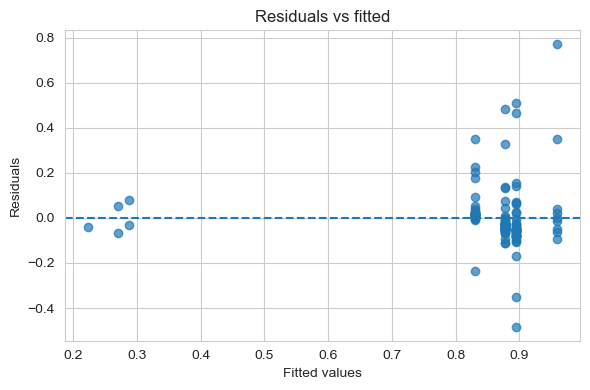

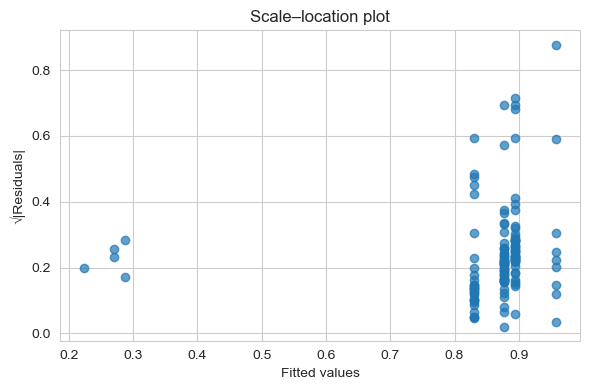

<Figure size 600x400 with 0 Axes>

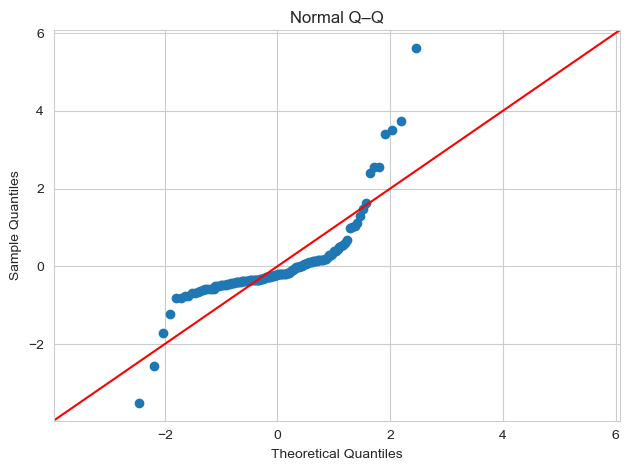

ValueError: x and y must have same first dimension, but have shapes (655734,) and (139,)

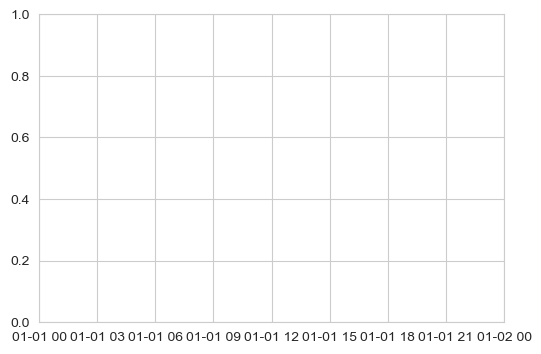

In [ ]:
# Handy objects
resid   = model.resid            # residuals
fitted  = model.fittedvalues     # ŷ
date    = df['trip_origin_date'] if 'trip_origin_date' in df.columns else df.index

# --- 1. Residuals vs Fitted -----------------------------------------------
plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, ls='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted")
plt.tight_layout()
plt.show()

# --- 3. Normal Q–Q plot ----------------------------------------------------
plt.figure(figsize=(6,4))
sm.qqplot(resid, line="45", fit=True)
plt.title("Normal Q–Q")
plt.tight_layout()
plt.show()

# --- 4. Residuals over time -----------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(date, resid, marker='o', linestyle='none')
plt.axhline(0, ls='--')
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residuals vs time")
plt.tight_layout()
plt.show()

# --- 5. Influence plot (outliers & leverage) ------------------------------
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.tight_layout()
plt.show()

# Title:

## 1. Abstract

## 2. Introduction

## 3. EDA

## 4. Analysis

## 5. Model Selection